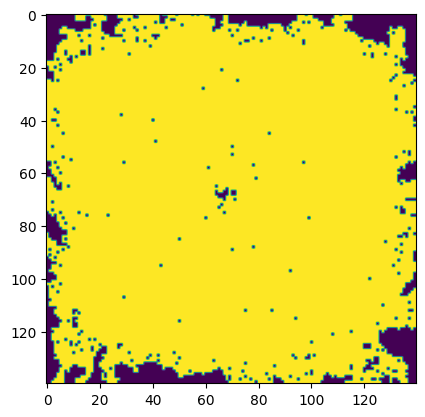

In [22]:
import numpy as np
import pandas as pd

#open text file
with open('input10.txt') as f:
    data = f.readlines()

data

data = [x.strip() for x in data]
new_data = []
for i,r in enumerate(data):
    new_data.append(list(data[i]))
np_array = np.array(new_data,dtype=object)

def check_constraints(row,col):
    rows,cols = np.shape(np_array)
    return (row >=0 and row < rows and col >= 0 and col < cols)

directions = {(1,0) :  {".": None,"S":None, "F": None,"L": (0,1), "J": (0,-1), "7": None, "-": None, "|": (1,0) },
              (-1,0):  {".": None,"S":None,"F": (0,1),"L": None, "J": None, "7": (0,-1),"-":None, "|": (-1,0) },
             (0,-1) : {".": None,"S":None,"F": (1,0),"L":(-1,0), "J": None, "7": None,"-":(0,-1), "|": None },
              (0,1) : {".": None,"S":None, "F": None,"L":None, "J": (-1,0), "7": (1,0),"-":(0,1), "|": None }
}



#rules
#L    up F |  , down None  , right J - , left None
#S    up | F 7,  down L, J | , right - J 7, left F  L -
#F  up None, down L, J | , right - 7 , J , left None, 
#J up | 7 F , down None, right None, left L F - 
#7 up None , right None, left F - 7
# - up None, down None, right - 7 J,  left - L  
# | up | F 7 , down | L J , right None, left None


#rules = {"L": {(-1,0): ["|",'F'], (1,0): None , (0,1): ["-",'J'],(0,-1) : None},
#         "S": {(-1,0): ["-",'F','L'], (1,0): ['F','|'] , (0,1): ["-",'7'],(0,-1) : ['-']}}
np_array   
coords = list(directions.keys())  
s_coord=  np.where(np_array =='S')[0][0],np.where(np_array =='S')[1][0]             
np_array[s_coord[0],s_coord[1]] = "100"


current = []
#for c in coords:
    #destination = None
    #if check_constraints(s_coord[0]+c[0],s_coord[1]+c[1]):
    #    destination = np_array[s_coord[0]+c[0],s_coord[1]+c[1]]
    #if destination in ["F","7","L","J","|","-"]:
        #current.append((s_coord[0]+c[0],s_coord[1]+c[1]))

current = [(s_coord[0],s_coord[1]-1),(s_coord[0],s_coord[1]+1)]

ct= 101
best = 0
coords = list(directions.keys())
best_coord = None
for rr in range(0,15000):
    next_d = []
    for m in current:
     
        np_array[m[0],m[1]]=f"{ct}"
        best = ct
        best_coord = (m[0],m[1])
        for c in coords:
            destination = None
            next_destination = None
            if check_constraints(m[0]+c[0],m[1]+c[1]):
                destination = np_array[m[0]+c[0],m[1]+c[1]]
                next_destination = directions[c].get(destination)
            
            if next_destination is not None:
                next_d.append((m[0]+c[0],m[1]+c[1]))

                
        
 
    current=next_d
   
    ct+=1

   
#np_array[np_array == "."] = "0"

#np_array = np.array(np_array,dtype=int)
#np.max(np_array)-100

#np.sum(np_array=="7")


import matplotlib.pyplot as plt

np_array[np_array =="."]="0"
np_array[np_array =="7"] ="0"
np_array[np_array =="J"]="0"
np_array[np_array =="F"]="0"
np_array[np_array =="7"]="0"
np_array[np_array =="L"]="0"
np_array[np_array =="-"]="0"
np_array[np_array =="|"]="0"

np_array = np.array(np_array,dtype=int)
np_array[np_array>=100] =100

#plt.figure(figsize=(16, 16)) 


    #if arr[X,Y]!=5:
    #    arr[current] = 1
import matplotlib.pyplot as plt
#plot image in matplotlib
#arr[250:300,250:280]=1
plt.imshow(np_array)

#6635
#7207



In [16]:
np.unique(np_array)

array([  0, 100])

In [74]:
np.max(np_array),best,current

(7206, 7206, [(39, 127), (39, 127)])

/var/folders/7p/yxy13g0s3rz3q5nhs0szjj8cyvvqr4/T/ipykernel_37515/856750813.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  np_array[np_array =="."]="10"
/var/folders/7p/yxy13g0s3rz3q5nhs0szjj8cyvvqr4/T/ipykernel_37515/856750813.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  np_array[np_array =="7"] ="0"
/var/folders/7p/yxy13g0s3rz3q5nhs0szjj8cyvvqr4/T/ipykernel_37515/856750813.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  np_array[np_array =="J"]="0"
/var/folders/7p/yxy13g0s3rz3q5nhs0szjj8cyvvqr4/T/ipykernel_37515/856750813.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  np_array[np_array =="F"]="0"
/var/folders/7p/yxy13g0s3rz3q5nhs0szjj8cyvvqr4

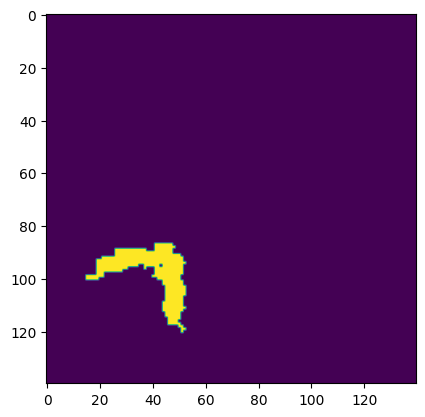

In [6]:
np.shape(np_array)

(140, 140)

In [22]:
np.sum(np_array[:,30])

80